In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
plt.style.use('fivethirtyeight')

Mean Squared Error for 145K: 715708969.2166667
Mean Squared Error for 174K: 3037124671.5
Sum of Mean Squared Errors (SMSE): 3752833640.7166667


<Axes: xlabel='Date'>

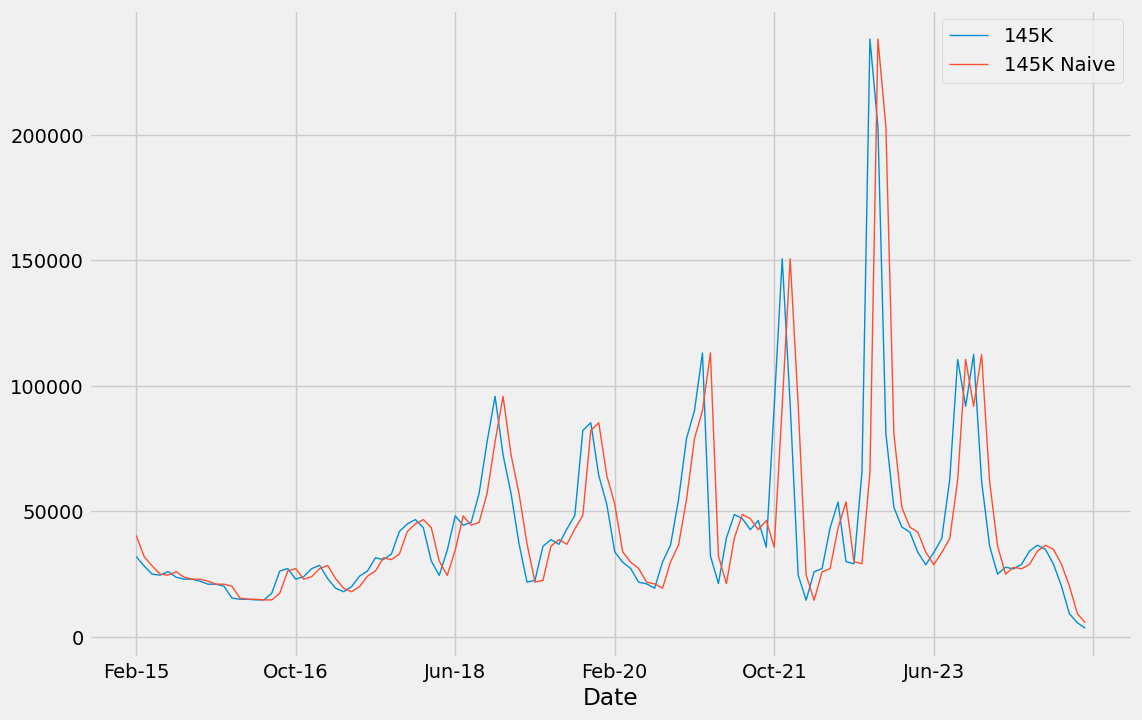

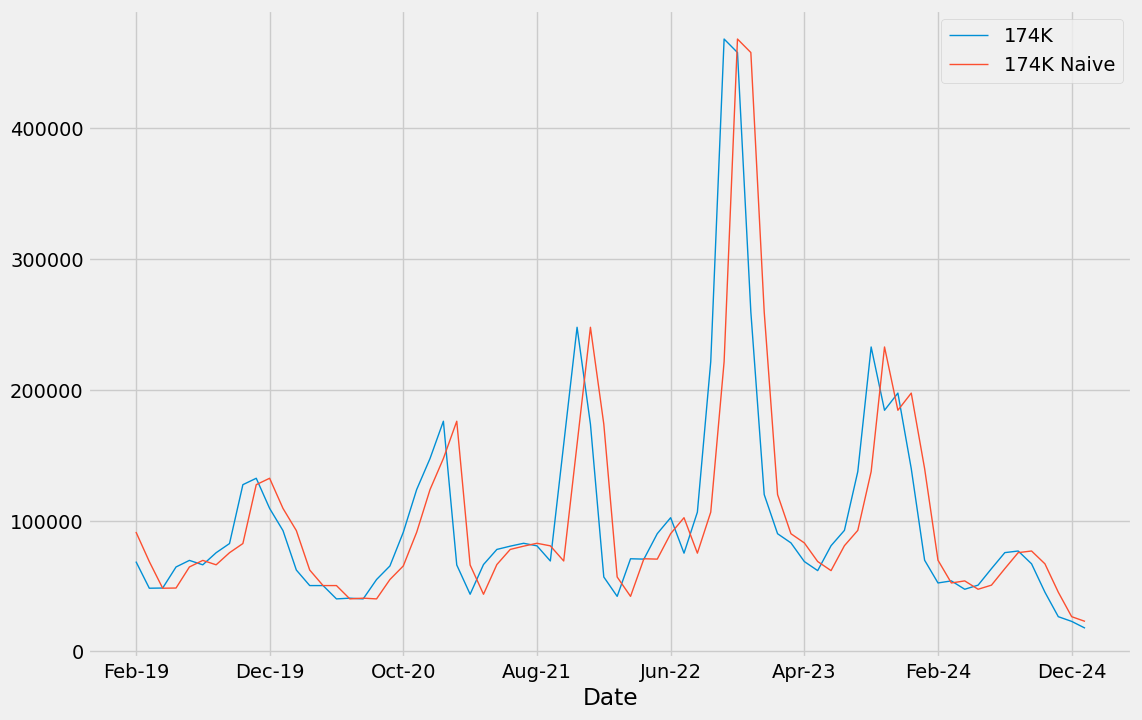

In [4]:
import pandas as pd

# Read CSV
data = pd.read_csv("datatest.csv")
#display(data)
# Convert 'Date' column to datetime and set as index
#display(pd.to_datetime(data.iloc[:, 0]))
#data['Date'] = pd.to_datetime(data.iloc[:,0])
data.set_index('Date', inplace=True)

# Ensure numeric data types
data.iloc[:, 0] = pd.to_numeric(data.iloc[:, 0], errors='coerce')
data.iloc[:, 1] = pd.to_numeric(data.iloc[:, 1], errors='coerce')


#display(data)

# Create a new DataFrame with the same index
df145 = pd.DataFrame(index=data.index)
df174 = pd.DataFrame(index=data.index)

# Copy actual values
df145['145K'] = data.iloc[:, 0]  # First column
df174['174K'] = data.iloc[:, 1]  # Second column

# Create Naïve Forecast (shifted previous values)
df145['145K Naive'] = df145['145K'].shift(1)  # Shift previous value down
df174['174K Naive'] = df174['174K'].shift(1)  # Shift previous value down
df145['145K Naive'].mean()

# Drop NaN values (first row will be NaN due to shift)
df145 = df145.dropna()
df174 = df174.dropna()
#display(df145)
#display(df174)

# Calculate Mean Squared Error (MSE) for each column
mse_145k = ((df145['145K'] - df145['145K Naive']) ** 2).mean()
mse_174k = ((df174['174K'] - df174['174K Naive']) ** 2).mean()
# Sum of Mean Squared Errors (SMSE)
smse = mse_145k + mse_174k
# Display the DataFrame
print(f"Mean Squared Error for 145K: {mse_145k}")
print(f"Mean Squared Error for 174K: {mse_174k}")
print(f"Sum of Mean Squared Errors (SMSE): {smse}")
#display(df)
df145.plot(linewidth=1,fontsize=14, figsize=(12, 8))
df174.plot(linewidth=1,fontsize=14, figsize=(12, 8))


ARIMA Model MSE: 2485925087.9581447


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/Library/Fram

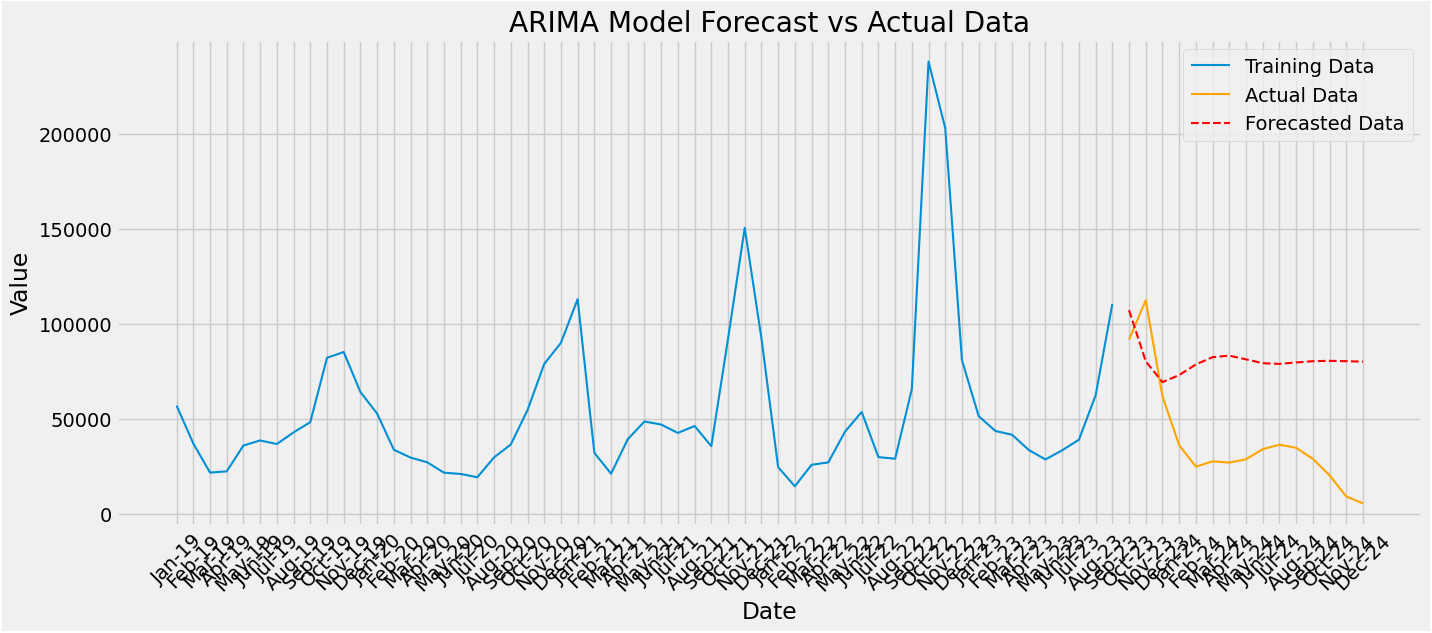

In [5]:

# Read CSV
data = pd.read_csv("datatest.csv")

# Convert 'Date' column to datetime and set as index
#data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Ensure numeric data types
data.iloc[:, 0] = pd.to_numeric(data.iloc[:, 0], errors='coerce')

# Drop NaN values
data = data.dropna()

# Train-Test Split (80% training, 20% testing)
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size, 0], data.iloc[train_size:, 0]

# Fit ARIMA Model (order can be optimized)
model = ARIMA(train, order=(5,1,0))  # (p=5, d=1, q=0)
model_fit = model.fit()

# Make Forecast
forecast = model_fit.forecast(steps=len(test))

# Calculate Error (MSE)
mse = mean_squared_error(test, forecast)
print(f"ARIMA Model MSE: {mse}")

# Plot Results with Proper X-Axis Formatting
plt.figure(figsize=(15,6), linewidth=1.5)

plt.plot(train.index, train, label="Training Data", linewidth=1.5)
plt.plot(test.index, test, label="Actual Data", color='orange', linewidth=1.5)
plt.plot(test.index, forecast, label="Forecasted Data", color='red', linestyle="dashed", linewidth=1.5)

# Formatting x-axis
#plt.gca().xaxis.
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))  # Format dates as "Month-Year"
plt.xticks(rotation=45)  # Rotate labels for better readability

plt.legend()
plt.title("ARIMA Model Forecast vs Actual Data")
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.show()